# Numpy Exercise 4

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Complete graph Laplacian

In discrete mathematics a [Graph](http://en.wikipedia.org/wiki/Graph_%28mathematics%29) is a set of *vertices* or *nodes* that are connected to each other by *edges* or *lines*. If those *edges* don't have directionality, the graph is said to be *undirected*. Graphs are used to model social and communications networks (Twitter, Facebook, Internet) as well as natural systems such as molecules.

A [Complete Graph](http://en.wikipedia.org/wiki/Complete_graph), $K_n$ on $n$ nodes has an edge that connects each node to every other node.

Here is $K_5$:

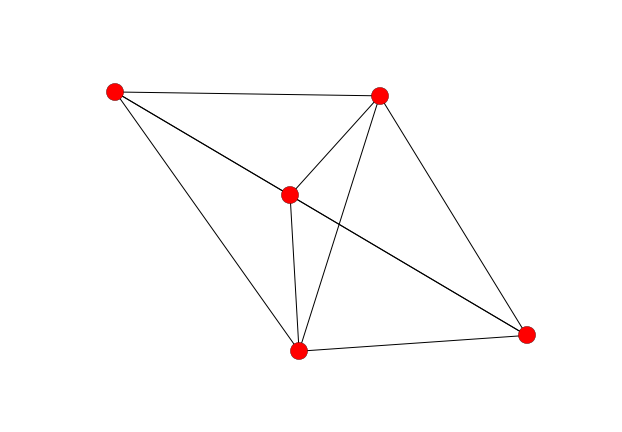

In [2]:
import networkx as nx
K_5=nx.complete_graph(5)
nx.draw(K_5)

The [Laplacian Matrix](http://en.wikipedia.org/wiki/Laplacian_matrix) is a matrix that is extremely important in graph theory and numerical analysis. It is defined as $L=D-A$. Where $D$ is the degree matrix and $A$ is the adjecency matrix. For the purpose of this problem you don't need to understand the details of these matrices, although their definitions are relatively simple.

The degree matrix for $K_n$ is an $n \times n$ diagonal matrix with the value $n-1$ along the diagonal and zeros everywhere else. Write a function to compute the degree matrix for $K_n$ using NumPy.

In [30]:
def complete_deg(n):
    """Return the integer valued degree matrix D for the complete graph K_n."""
    # YOUR CODE HERE   (Late Assignment)
    v = np.identity((n), dtype=np.int)
    b = (n*v)-v                 #Takes NxN identity matrix, multiplies elements by n, then subtracts by an identity matrix.
    return b

print complete_deg(3)

[[2 0 0]
 [0 2 0]
 [0 0 2]]


In [31]:
D = complete_deg(5)
assert D.shape==(5,5)
assert D.dtype==np.dtype(int)
assert np.all(D.diagonal()==4*np.ones(5))
assert np.all(D-np.diag(D.diagonal())==np.zeros((5,5),dtype=int))

The adjacency matrix for $K_n$ is an $n \times n$ matrix with zeros along the diagonal and ones everywhere else. Write a function to compute the adjacency matrix for $K_n$ using NumPy.

In [34]:
def complete_adj(n):
    """Return the integer valued adjacency matrix A for the complete graph K_n."""
    a = np.ones((n, n), dtype=np.int)       #Creates NxN matrix filled with ones.
    b = np.identity((n), dtype=np.int)      #Creates NxN identity matrix
    c = a-b                                 #subtracts Ones matrix by identity matrix
    return c
print complete_adj(5)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


In [35]:
A = complete_adj(5)
assert A.shape==(5,5)
assert A.dtype==np.dtype(int)
assert np.all(A+np.eye(5,dtype=int)==np.ones((5,5),dtype=int))

Use NumPy to explore the eigenvalues or *spectrum* of the Laplacian *L* of $K_n$. What patterns do you notice as $n$ changes? Create a *conjecture* about the general Laplace *spectrum* of $K_n$.

In [50]:
# YOUR CODE HERE
def laplacian(n):
    d = complete_deg(n)
    a = complete_adj(n)
    l = d-a               #subtracts adjacency matrix from degree matrix
    return l
print np.linalg.eig(laplacian(7))   #Returns eigenvalue of laplacian

(array([  7.00000000e+00,  -1.11022302e-15,   7.00000000e+00,
         7.00000000e+00,   7.00000000e+00,   7.00000000e+00,
         7.00000000e+00]), array([[ 0.9258201 , -0.37796447,  0.31077239, -0.25294226,  0.08369757,
        -0.31943249,  0.33795455],
       [-0.15430335, -0.37796447,  0.46626648, -0.23375062,  0.12001206,
        -0.34292503,  0.33912743],
       [-0.15430335, -0.37796447, -0.62674589,  0.43033214, -0.0773586 ,
        -0.53480233,  0.275483  ],
       [-0.15430335, -0.37796447, -0.445462  , -0.70465879, -0.1676278 ,
         0.56397714, -0.11998058],
       [-0.15430335, -0.37796447, -0.08289422,  0.20928491, -0.27101435,
         0.05218692, -0.74650212],
       [-0.15430335, -0.37796447,  0.09838968,  0.23317434,  0.79735408,
         0.2416101 ,  0.20142009],
       [-0.15430335, -0.37796447,  0.27967357,  0.31856029, -0.48506297,
         0.33938568, -0.28750237]]))


YOUR ANSWER HERE: As n increases, the number of eigenvalues increases, so that there are n eigenvalues, each with value n, except for the second eigenvalue, which is zero. Thus, the spectrum will strectch out for as large as n is, with a discontinuity at the second value only.